In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# airfoil_self_noise.dat is in tab seperated format

# https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise#

In [3]:
# pd.read_csv('airfoil_self_noise.dat',sep='\t')

In [4]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)
df.head()
# search, how to make first row not as a header in pandas

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
# pd.read_csv('airfoil_self_noise.dat',sep='\t',names=['Frequency','Angle of attack','Chord Length','Free Stream Velocity','Suction side','Scaled Sound Pressure Level'])

## dataset
- This problem has the following inputs:
- 1. Frequency, in Hertzs.
- 2. Angle of attack, in degrees.
- 3. Chord length, in meters.
- 4. Free-stream velocity, in meters per second.
- 5. Suction side displacement thickness, in meters.

The only output is:
- 6. Scaled sound pressure level, in decibels.

In [6]:
## this is a regression problem
## we are trying to predict the output with input features

In [7]:
df.columns=["Frequency","Angle of Attack","Chord Length","Free-stream Velocity","Suction side","Pressure Level"]
df.head()

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side,Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
df.isnull().sum()
# if there are categorical variables, we can do one hot encoding, labeling 

Frequency               0
Angle of Attack         0
Chord Length            0
Free-stream Velocity    0
Suction side            0
Pressure Level          0
dtype: int64

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
## correlation

### before doing correlation,do train test split , because we do correlation on train data

In [13]:
X_train.head()

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


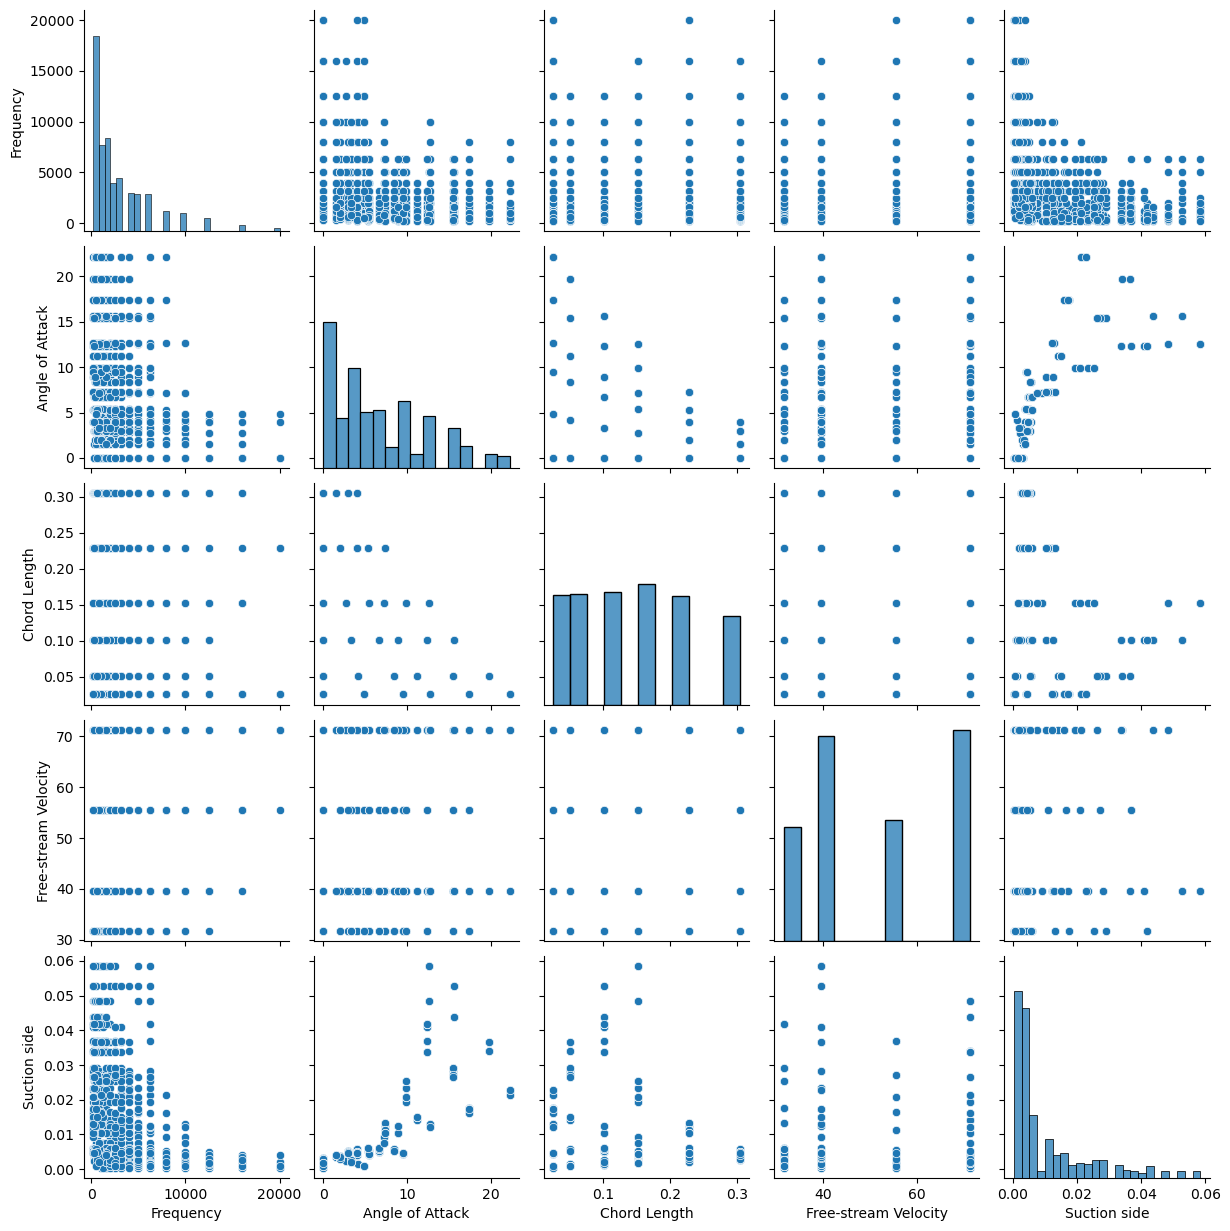

In [14]:
# now we have to do EDA

import seaborn as sns

sns.pairplot(X_train)
# we are using pairplot to see the correlation between each column combination

In [15]:
## Correlation
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of Attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord Length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream Velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


In [16]:
## pandas profiling - it will give the EDA report

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

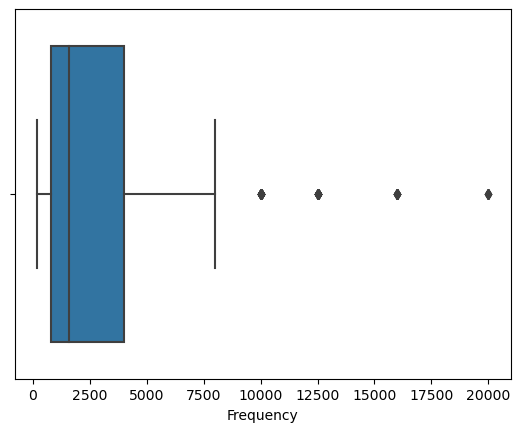

In [17]:
sns.boxplot(X_train['Frequency'])
# plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Pressure Level'>

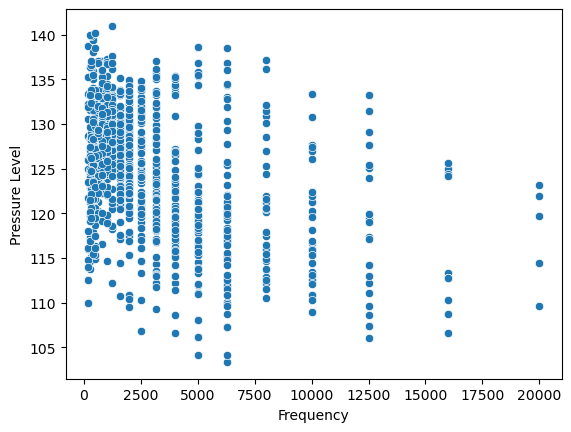

In [18]:
## relationship between frequency and pressure length
sns.scatterplot(X_train['Frequency'],y_train)


In [19]:
len(df['Pressure Level'].unique())

1456

In [20]:
## we can see that there are many categories, so it is a regression problem
## if there are 20-30 categories, then we can take this as classification problem

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure Level'>

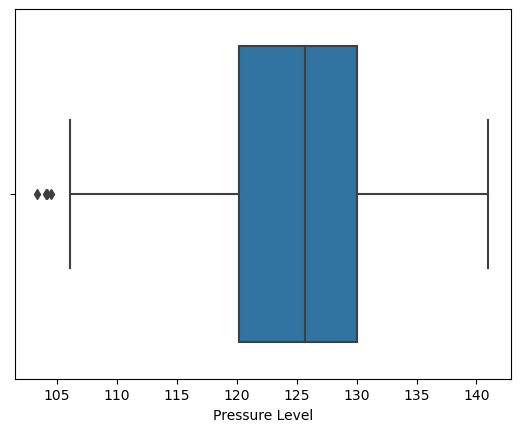

In [21]:
sns.boxplot(df['Pressure Level'])

In [22]:
## we are applying regression 
## we can apply , lasso,ridge,svr , random forest regressor

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linearRegressor=LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(linearRegressor,X,y,scoring='neg_mean_squared_error',cv=5)

In [25]:
mse

array([ -9.21171285, -20.46007637, -23.09732057, -56.98314764,
       -26.19085928])

In [26]:
mse.mean()

-27.188623343053365

In [27]:
mse.std()

15.961770732351766

## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridgeRegressor=Ridge()
ridgeRegressor

Ridge()

In [30]:
params={'alpha':[1e-5,1e-3,1e-1,1,2,3,4,6,8,10,20,50]}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
gcv=GridSearchCV(ridgeRegressor,param_grid=params,scoring='neg_mean_squared_error',cv=5)

In [33]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 0.1, 1, 2, 3, 4, 6, 8, 10, 20,
                                   50]},
             scoring='neg_mean_squared_error')

In [34]:
gcv.best_params_

{'alpha': 0.001}

In [35]:
gcv.best_score_

-23.602891271038246

In [36]:
ridgePrediction=gcv.predict(X_test)
ridgePrediction

array([124.06705302, 119.63920446, 120.28762977, 129.62925752,
       129.8225887 , 132.6018393 , 122.45073586, 126.73868902,
       129.99013965, 125.93569491, 132.51575833, 113.7800042 ,
       130.08706201, 132.49261021, 123.63380043, 114.15096106,
       124.30501106, 126.6680201 , 129.24109048, 131.7816413 ,
       125.78317937, 125.04280684, 116.4650276 , 129.87876771,
       124.22882406, 124.68812156, 131.6001662 , 124.56008195,
       115.80892184, 123.4364713 , 125.10999832, 123.92896899,
       125.47556369, 118.60196068, 121.69359806, 130.95047543,
       131.40264655, 128.28101724, 121.28393498, 118.0450114 ,
       126.40363022, 128.85432561, 126.44682451, 123.47101942,
       123.07427923, 130.12968005, 125.11716314, 120.01574536,
       123.20444689, 132.81118589, 128.73199161, 117.78709555,
       123.41928729, 122.58672894, 126.71457667, 120.42146802,
       123.30010709, 128.68108876, 124.25835619, 123.2152441 ,
       125.43922223, 131.09794315, 126.72641467, 131.35

In [37]:
import seaborn as sns
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure Level', ylabel='Density'>

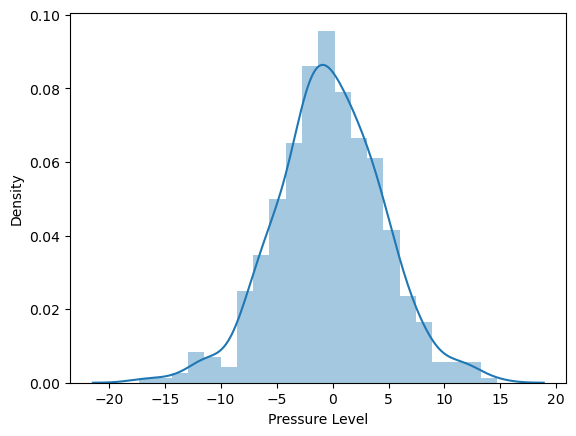

In [38]:
sns.distplot(y_test-ridgePrediction)

In [39]:
## accuracy
from sklearn.metrics import r2_score

r2_score(y_test,ridgePrediction)

0.5125022911438959

## K Nearest Regressor

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

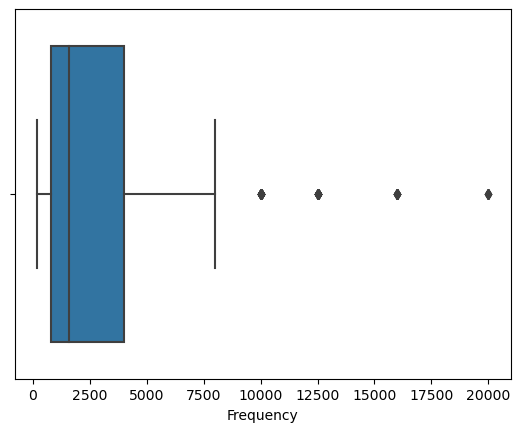

In [40]:
sns.boxplot(X_train['Frequency'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle of Attack'>

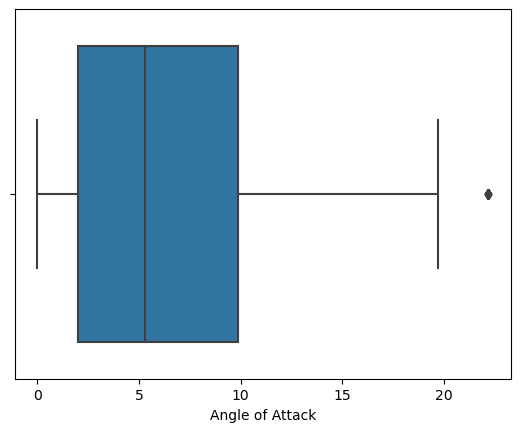

In [41]:
sns.boxplot(X_train['Angle of Attack'])

In [42]:
X.columns

Index(['Frequency', 'Angle of Attack', 'Chord Length', 'Free-stream Velocity',
       'Suction side'],
      dtype='object')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle of Attack'>

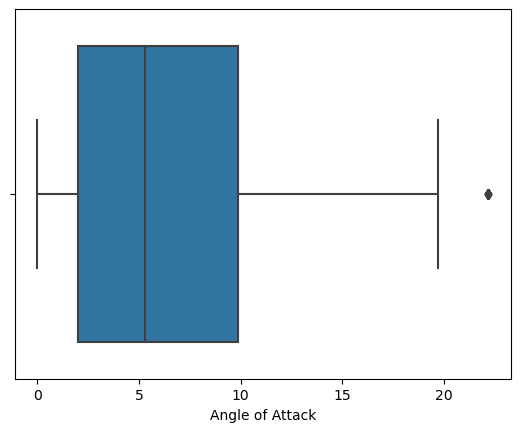

In [43]:
sns.boxplot(X_train['Angle of Attack'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Free-stream Velocity'>

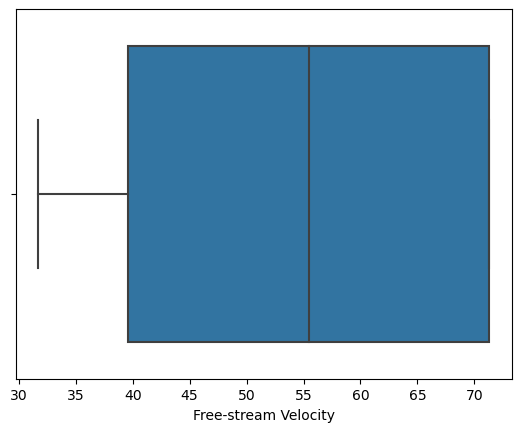

In [44]:
sns.boxplot(X_train['Free-stream Velocity'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suction side'>

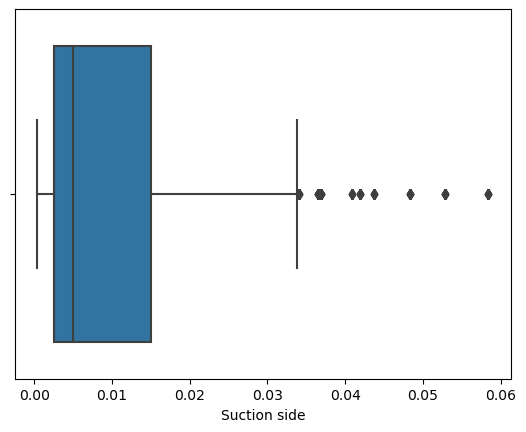

In [45]:
sns.boxplot(X_train['Suction side'])

In [46]:
X

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [47]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Pressure Level, Length: 1503, dtype: float64

In [48]:

from sklearn.model_selection import train_test_split

Xk_train,Xk_test,yk_train,yk_test=train_test_split(X,y,test_size=0.30)

In [49]:
Xk_train

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
19,1600,0.0,0.3048,55.5,0.002831
1300,3150,3.3,0.1016,71.3,0.002028
526,500,2.7,0.1524,39.6,0.002948
641,3150,9.9,0.1524,71.3,0.019300
1016,16000,4.8,0.0254,71.3,0.000849
...,...,...,...,...,...
374,10000,5.3,0.2286,71.3,0.005194
143,400,3.0,0.3048,31.7,0.005295
102,1250,3.0,0.3048,71.3,0.004257
1090,1600,9.5,0.0254,39.6,0.004498


In [50]:
Xk_test

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
456,1250,0.0,0.1524,71.3,0.001599
334,800,4.0,0.2286,39.6,0.004738
1161,5000,17.4,0.0254,71.3,0.016104
1240,630,0.0,0.1016,71.3,0.001211
49,250,0.0,0.3048,31.7,0.003313
...,...,...,...,...,...
1084,400,9.5,0.0254,39.6,0.004498
382,1250,5.3,0.2286,39.6,0.006143
589,1600,5.4,0.1524,31.7,0.005255
1291,6300,0.0,0.1016,31.7,0.001501


In [51]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(Xk_train)
#fit the Xk_train ,since there are outliers
# print(Xk_train)
XK_train_transformed=scaler.transform(Xk_train)

In [52]:
Xk_test=scaler.transform(Xk_test)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knnRegressor=KNeighborsRegressor(n_neighbors=1)


In [54]:
knnRegressor

KNeighborsRegressor(n_neighbors=1)

In [55]:
Xk_train

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
19,1600,0.0,0.3048,55.5,0.002831
1300,3150,3.3,0.1016,71.3,0.002028
526,500,2.7,0.1524,39.6,0.002948
641,3150,9.9,0.1524,71.3,0.019300
1016,16000,4.8,0.0254,71.3,0.000849
...,...,...,...,...,...
374,10000,5.3,0.2286,71.3,0.005194
143,400,3.0,0.3048,31.7,0.005295
102,1250,3.0,0.3048,71.3,0.004257
1090,1600,9.5,0.0254,39.6,0.004498


In [56]:
yk_train

19      126.986
1300    132.114
526     121.009
641     116.849
1016    124.208
         ...   
374     111.350
143     125.398
102     127.634
1090    131.184
1111    124.426
Name: Pressure Level, Length: 1052, dtype: float64

In [57]:
scores=cross_val_score(knnRegressor,Xk_train,yk_train,cv=10)


In [58]:
scores

array([-0.71936532, -0.22919341, -0.29657109, -0.45175717, -0.05991121,
       -0.55035796, -0.55086403, -0.14611268, -0.2961034 , -0.11255789])

In [59]:
scores.mean()

-0.3412794158585938

## SVM- SVR

In [60]:
from sklearn.svm import SVR
#rbf SVR

svrRegression=SVR()#default kerenl=rbf

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=3)

In [62]:
svrRegression.fit(X_train,y_train)

SVR()

In [63]:
svr_predictions=svrRegression.predict(X_test)
svr_predictions

array([126.28533397, 123.67976833, 127.1228707 , 117.85683296,
       118.30797807, 127.29751567, 127.23347191, 127.18485467,
       125.25726653, 127.23772002, 127.24102311, 119.62336822,
       123.68351994, 127.30419101, 127.38226777, 125.25803399,
       126.89225985, 127.35076535, 126.88429598, 127.17714741,
       127.3482915 , 127.23347202, 127.30492648, 125.26372784,
       119.61803204, 126.89195033, 127.35795103, 119.62390368,
       127.23260116, 118.30675335, 127.29598445, 126.27640911,
       127.35463029, 126.27640904, 127.17821052, 125.26438795,
       117.58045401, 127.246977  , 126.27615828, 127.35497842,
       127.37753803, 126.28383282, 125.26455358, 121.56896091,
       127.22445129, 118.30815364, 119.62309174, 118.30993519,
       127.35057947, 126.88214284, 117.58003892, 125.25943568,
       127.30479828, 127.22935028, 118.31101927, 117.57999973,
       126.89120026, 127.22264905, 127.34818567, 119.62289458,
       127.29771175, 126.27640897, 127.35093848, 117.85

In [64]:
## using cross search value
from sklearn.model_selection import cross_val_score
csvScores=cross_val_score(svrRegression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)


In [65]:
csvScores

array([-41.29260157, -45.43665478, -37.737557  , -43.47178442,
       -36.64745203, -38.97735548, -35.4944035 , -41.74926926,
       -39.42150943, -42.45820731])

In [66]:
csvScores.mean()

-40.26867947819086

In [67]:
from sklearn.metrics import r2_score

r2_score(y_test,svr_predictions)

0.19354096564147205

## Linear SVR

In [ ]:
## linear SVr

from sklearn.svm import SVR

svrRegression=SVR(kernel='linear')#default kerenl=rbf

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=3)

svrRegression.fit(X_train,y_train)

svr_linear_predictions=svrRegression.predict(X_test)

r2_score(y_test,svr_linear_predictions)

In [ ]:
## poly

from sklearn.svm import SVR

svrRegression=SVR(kernel='poly')#default kerenl=rbf

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=3)

svrRegression.fit(X_train,y_train)

svr_linear_predictions=svrRegression.predict(X_test)

r2_score(y_test,svr_linear_predictions)

In [ ]:
## sigmoid

from sklearn.svm import SVR

svrRegression=SVR(kernel='sigmoid')#default kerenl=rbf

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=3)

svrRegression.fit(X_train,y_train)

svr_linear_predictions=svrRegression.predict(X_test)

r2_score(y_test,svr_linear_predictions)

In [ ]:
## precomputed

from sklearn.svm import SVR

svrRegression=SVR(kernel='precomputed')#default kerenl=rbf

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=3)

svrRegression.fit(X_train,y_train)

svr_linear_predictions=svrRegression.predict(X_test)

r2_score(y_test,svr_linear_predictions)

In [ ]:
## grid search cv

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid={'kernel':['linear', '‘poly’', 'rbf','sigmoid','precomputed']}
# gsv=GridSearchCV(svrRegression,param_grid,scoring='neg_mean_squared_error',cv=10)


In [ ]:
# gsv.fit(X_train,y_train)

In [ ]:
# gsv.best_params_

In [ ]:
# gsv.best_score_

## Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor=RandomForestRegressor()

In [69]:
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
rfr_predictions=randomForestRegressor.predict(X_test)
rfr_predictions

array([133.21552, 126.56794, 121.95617, 131.58264, 115.121  , 129.9807 ,
       128.09785, 118.98368, 116.08826, 124.78264, 122.96162, 109.92563,
       124.1239 , 118.9755 , 127.49654, 120.4076 , 126.64749, 128.17771,
       132.45829, 128.11263, 129.41806, 129.66008, 132.52085, 129.12754,
       111.11022, 129.63827, 128.84159, 116.92648, 132.41362, 110.12761,
       128.40438, 131.39208, 126.87717, 132.44092, 120.89873, 131.78583,
       116.67945, 134.6096 , 122.65584, 128.02328, 132.32138, 125.17579,
       124.42982, 119.0619 , 130.09438, 114.12477, 118.37218, 116.3049 ,
       128.35442, 132.34154, 113.01533, 130.30053, 133.66022, 127.85545,
       115.38662, 126.69259, 124.59807, 126.22644, 129.63763, 121.80309,
       123.99561, 127.69644, 129.83917, 128.20706, 131.93927, 131.37985,
       128.65841, 125.62202, 112.57235, 126.34352, 125.71334, 128.11356,
       134.54142, 119.89342, 126.15669, 122.3773 , 122.26207, 126.10857,
       128.20922, 130.97632, 110.50511, 117.58262, 

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test,rfr_predictions)

0.9116702949410157

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure Level', ylabel='Density'>

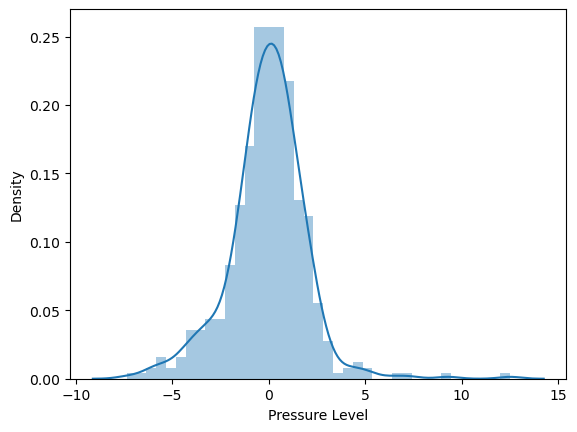

In [72]:
sns.distplot(y_test-rfr_predictions)

In [73]:
## save model to pickle file

import pickle
pickle.dump(randomForestRegressor,open('rfr_model_airfoil.pkl','wb'))

In [74]:
pickled_model=pickle.load(open('rfr_model_airfoil.pkl','rb'))
#we can load it and predict on the model

In [75]:
pickled_model.predict(X_test)

array([133.21552, 126.56794, 121.95617, 131.58264, 115.121  , 129.9807 ,
       128.09785, 118.98368, 116.08826, 124.78264, 122.96162, 109.92563,
       124.1239 , 118.9755 , 127.49654, 120.4076 , 126.64749, 128.17771,
       132.45829, 128.11263, 129.41806, 129.66008, 132.52085, 129.12754,
       111.11022, 129.63827, 128.84159, 116.92648, 132.41362, 110.12761,
       128.40438, 131.39208, 126.87717, 132.44092, 120.89873, 131.78583,
       116.67945, 134.6096 , 122.65584, 128.02328, 132.32138, 125.17579,
       124.42982, 119.0619 , 130.09438, 114.12477, 118.37218, 116.3049 ,
       128.35442, 132.34154, 113.01533, 130.30053, 133.66022, 127.85545,
       115.38662, 126.69259, 124.59807, 126.22644, 129.63763, 121.80309,
       123.99561, 127.69644, 129.83917, 128.20706, 131.93927, 131.37985,
       128.65841, 125.62202, 112.57235, 126.34352, 125.71334, 128.11356,
       134.54142, 119.89342, 126.15669, 122.3773 , 122.26207, 126.10857,
       128.20922, 130.97632, 110.50511, 117.58262, 

In [76]:
## importance of pickle file

In [77]:
# X_test is a huge dataset and we are trying to predict for entire records
X_test

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
851,2000,11.2,0.0508,71.3,0.014072
816,3150,8.4,0.0508,55.5,0.005449
919,250,15.4,0.0508,31.7,0.028985
1042,8000,4.8,0.0254,39.6,0.000907
581,6300,5.4,0.1524,39.6,0.004850
...,...,...,...,...,...
393,400,7.3,0.2286,71.3,0.010440
1479,800,15.6,0.1016,71.3,0.043726
626,6300,7.2,0.1524,39.6,0.009092
1037,2500,4.8,0.0254,39.6,0.000907


In [78]:
## we are giving X_test in the form of dataFrame
## we can also give a huge dataset too
## in most scenarios, companies will give one record at a time and find out the prediction


In [80]:
type(X_test)

pandas.core.frame.DataFrame

In [81]:
pd.DataFrame(X_test.iloc[0,:]).T

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction side
851,2000.0,11.2,0.0508,71.3,0.014072


In [82]:
pickled_model.predict(pd.DataFrame(X_test.iloc[0,:]).T)

array([133.21552])

In [83]:
X_test.loc[51]

Frequency               400.000000
Angle of Attack           0.000000
Chord Length              0.304800
Free-stream Velocity     31.700000
Suction side              0.003313
Name: 51, dtype: float64

In [84]:
dict_test={
    "Frequency":9,
    "Angle of Attack":8,
    "Chord Length":10,
    "Free-stream Velocity":1,
    "Suction side":7
}

dict_test

{'Frequency': 9,
 'Angle of Attack': 8,
 'Chord Length': 10,
 'Free-stream Velocity': 1,
 'Suction side': 7}

In [85]:
dict_test.keys()

dict_keys(['Frequency', 'Angle of Attack', 'Chord Length', 'Free-stream Velocity', 'Suction side'])

In [86]:
dict_test.values()

dict_values([9, 8, 10, 1, 7])

In [87]:
type(dict_test.values())
#type is dict_values, not list

dict_values

In [88]:
list(dict_test.values())

[9, 8, 10, 1, 7]

In [89]:
pickled_model.predict(list(dict_test.values()))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.  8. 10.  1.  7.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
## we have to convert to array and reshape it
## how to convert to 2d array?
list(list(dict_test.values()))

## Prediction for one single value

In [90]:
pickled_model.predict([[9, 8, 10, 1, 7]])
# it is working

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([119.49992])

In [91]:
output=pickled_model.predict([[9, 8, 10, 1, 7]])[0]
# it is working

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


119.49992000000002

In [92]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [93]:
## testing batch inputs

batch_data=[{
        "Frequency":400,
        "Angle of Attack":0.0,
        "Chord Length":0.3048,
        "Free-stream Velocity":31.7,
        "Suction side":0.003313
    },
     {
        "Frequency":1250,
        "Angle of Attack":12.3,
        "Chord Length":0.1016,
        "Free-stream Velocity":31.7,
        "Suction side":0.041876
    }
 ]
#         400	0.0	0.3048	31.7	0.003313
# 1250	12.3	0.1016	31.7	0.041876

In [94]:
batch_data

[{'Frequency': 400,
  'Angle of Attack': 0.0,
  'Chord Length': 0.3048,
  'Free-stream Velocity': 31.7,
  'Suction side': 0.003313},
 {'Frequency': 1250,
  'Angle of Attack': 12.3,
  'Chord Length': 0.1016,
  'Free-stream Velocity': 31.7,
  'Suction side': 0.041876}]

In [95]:
batch_data_list=[ list(i.values()) for i in batch_data ]
batch_data_list

[[400, 0.0, 0.3048, 31.7, 0.003313], [1250, 12.3, 0.1016, 31.7, 0.041876]]

In [98]:
output=pickled_model.predict(batch_data_list)
output

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([124.25406, 118.75044])